## 7. Peak finding and tree generation

This notebook illustrates the generation of the tree of peaks from a spectra.

Used are observations from Hyytiälä, Finnland (61.844°N, 24.287°E) on 14 January 2024.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import datetime
import pprint

import sys, os
sys.path.append('/home/jupyter-jhcustadmin/peakTree/')
import peakTree
import peakTree.helpers as h


In [3]:
%matplotlib inline

In [18]:
pTB = peakTree.peakTreeBuffer(config_file='instrument_config.toml', system='rpg94_hyytiala')

# the default peak finding settings are loaded from the instrument config.toml file
pTB.settings

fatal: Not a valid object name HEAD


{'grid_time': False,
 'max_no_nodes': 15,
 'tot_spec_scaling': 1,
 'polarimetry': 'LDR',
 'smooth_cut_sequence': 'sc',
 'decoupling': -28.5,
 'station_altitude': 150,
 'peak_finding_params': {'chirp0': {'thres_factor_co': False,
   'thres_factor_cx': 4,
   'smooth_in_dB': False,
   't_avg': 9,
   'h_avg': 0,
   'span': 0.1,
   'smooth_polyorder': 2,
   'prom_thres': 0.5,
   'width_thres': 0},
  'chirp1': {'thres_factor_co': False,
   'thres_factor_cx': 4,
   'smooth_in_dB': False,
   't_avg': 0,
   'h_avg': 0,
   'span': 0.2,
   'smooth_polyorder': 2,
   'prom_thres': 0.5,
   'width_thres': 0},
  'chirp2': {'thres_factor_co': False,
   't_avg': 0,
   'h_avg': 0,
   'span': 0.2,
   'smooth_polyorder': 2,
   'prom_thres': 1.0,
   'width_thres': 0}}}

In [19]:
pTB.load('/srv/data/shareddata/hyytiala/240114_080000_P09_ZEN.LV0', load_to_ram=True)

chirp: 1, shape spec_chunk: (3, 1, 1024)


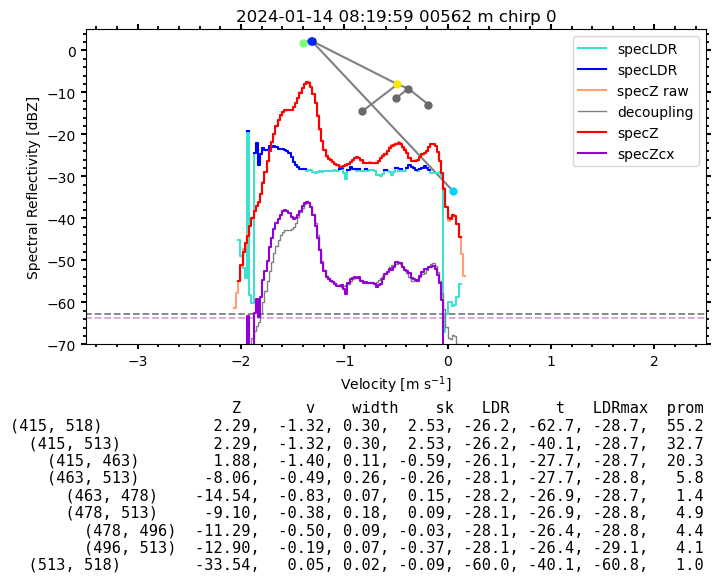

In [20]:

# First, just look at one single spectrum,
# later include more into the run

specs = [
    [h.dt_to_ts(datetime.datetime(2024, 1, 14, 8, 20)), 550],
]

plot_path = 'plots/'
if not os.path.isdir(plot_path):
    os.mkdir(plot_path)
    
for ts, rg in specs:
    tree, spectrum = pTB.get_tree_at(ts, rg)
      
    
    fig, ax = peakTree.print_tree.plot_spectrum(tree, spectrum, None)
    ax.set_xlim([-3.5, 2.5])
    ax.set_ylim([-70, 5])
       
    dt=h.ts_to_dt(spectrum['ts'])
    savename = '{}_{:0>5.0f}m_spectrum.png'.format(dt.strftime('%Y-%m-%d_%H%M%S'), spectrum['range'])
#   fig.savefig(plot_path + savename, dpi=250)

lasttree = tree

### Reminder binary tree structure

<br />
<div>
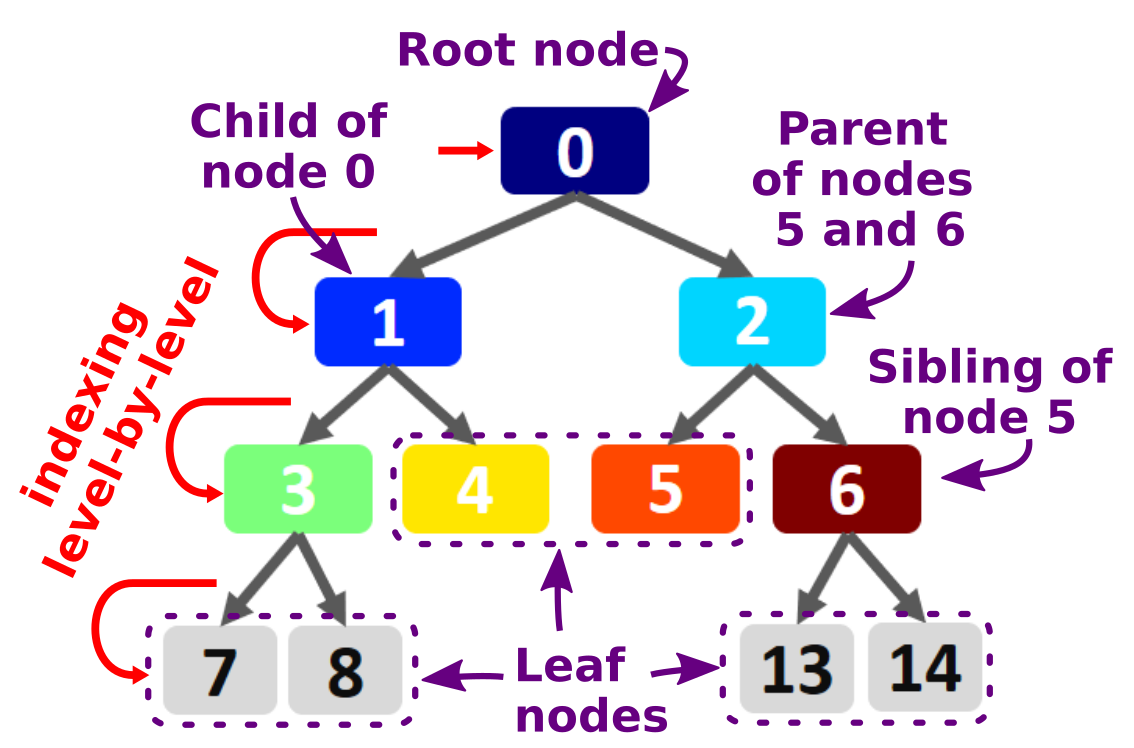
</div>

In [7]:
# How is the tree stored internally?

pprint.pprint(lasttree)

{0: {'bounds': (417, 516),
     'coords': [0],
     'ldr': np.float64(0.002221632897184343),
     'ldrleft': np.float64(nan),
     'ldrmax': np.float64(0.001402795343364589),
     'ldrmin': np.float64(0.001402795343364589),
     'ldrright': np.float64(nan),
     'parent_id': -1,
     'prominence': np.float64(321706.8636267227),
     'skew': 2.5220070208935472,
     'thres': np.float64(5.392077136050419e-07),
     'v': -1.3182210577802485,
     'width': 0.2976978949365889,
     'z': np.float64(1.6817992151818064)},
 1: {'bounds': (417, np.int64(463)),
     'coords': [0, 0],
     'ldr': np.float64(0.002262368277637575),
     'ldrleft': np.float64(0.004419212547699991),
     'ldrmax': np.float64(0.001402795343364589),
     'ldrmin': np.float64(0.001402795343364589),
     'ldrright': np.float64(0.0015008140978027909),
     'parent_id': 0,
     'prominence': np.float64(101.98093324047056),
     'skew': -0.5672025973227712,
     'thres': np.float64(0.001700973082666151),
     'v': -1.4026094

chirp: 1, shape spec_chunk: (3, 1, 1024)


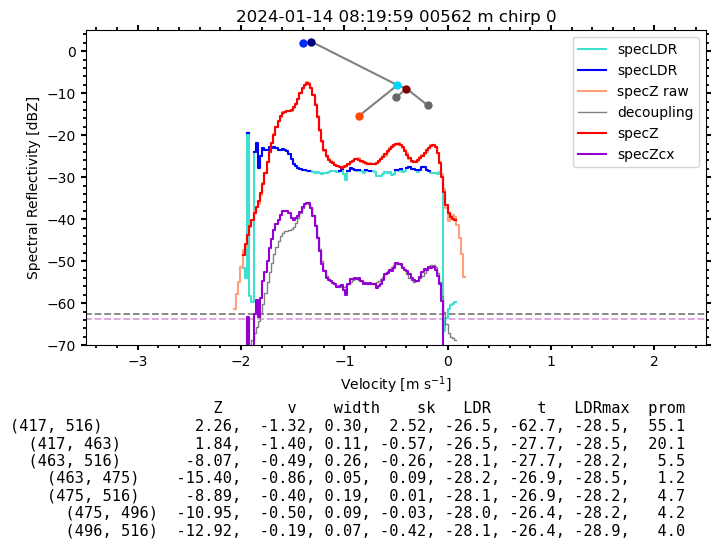

In [21]:
# let's modify some of the settings
pTB.settings['peak_finding_params']['chirp0']['span'] = 0.2
pTB.settings['peak_finding_params']['chirp0']['h_avg'] = 0
pTB.settings['peak_finding_params']['chirp0']['prom_thres'] = 0.1

for ts, rg in specs:
    tree, spectrum = pTB.get_tree_at(ts, rg)
    
    fig, ax = peakTree.print_tree.plot_spectrum(tree, spectrum, None)
    ax.set_xlim([-3.5, 2.5])
    ax.set_ylim([-70, 5])
       
    dt=h.ts_to_dt(spectrum['ts'])
    savename = '{}_{:0>5.0f}m_spectrum.png'.format(dt.strftime('%Y-%m-%d_%H%M%S'), spectrum['range'])
#   fig.savefig(plot_path + savename, dpi=250)

### Exercises

- experiment with different peak finding parameters
- try the peak finding parameters obtained with peako